# **Computational Drug Discovery**


---

## **Installing libraries**

---



Install the ChEMBL web service package.

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 3.4 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


## **Importing libraries**

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [37]:
!conda install -c rdkit rdkit

In [1]:
! pip install lazypredict

In [2]:
from chembl_webresource_client.new_client import new_client

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

from scipy.stats import mannwhitneyu
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import lazypredict
from lazypredict.Supervised import LazyRegressor

## **Search for Target protein**

In [46]:
# Target search for breast cancer(Aromatase)
target = new_client.target
target_query = target.search('aromatase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.00,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.00,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


### **Select and retrieve bioactivity data for *Human Aromatase* (first entry)**

In [47]:
selected_target = targets.target_chembl_id[0]
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df1 = pd.DataFrame.from_dict(res)
print(len(df1))
df1.head(3)

2926


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238


**Features Amount of Data in Dataset**

In [ ]:
column_name=[] 
column_num=[]
c=0;
for col_name in df1.columns: 
  column_num.append(c)
  c=c+1
  column_name.append(col_name)
each_count=[]
for col_name in column_num: 
  each_count.append(df1[column_name[col_name]].value_counts().sum())

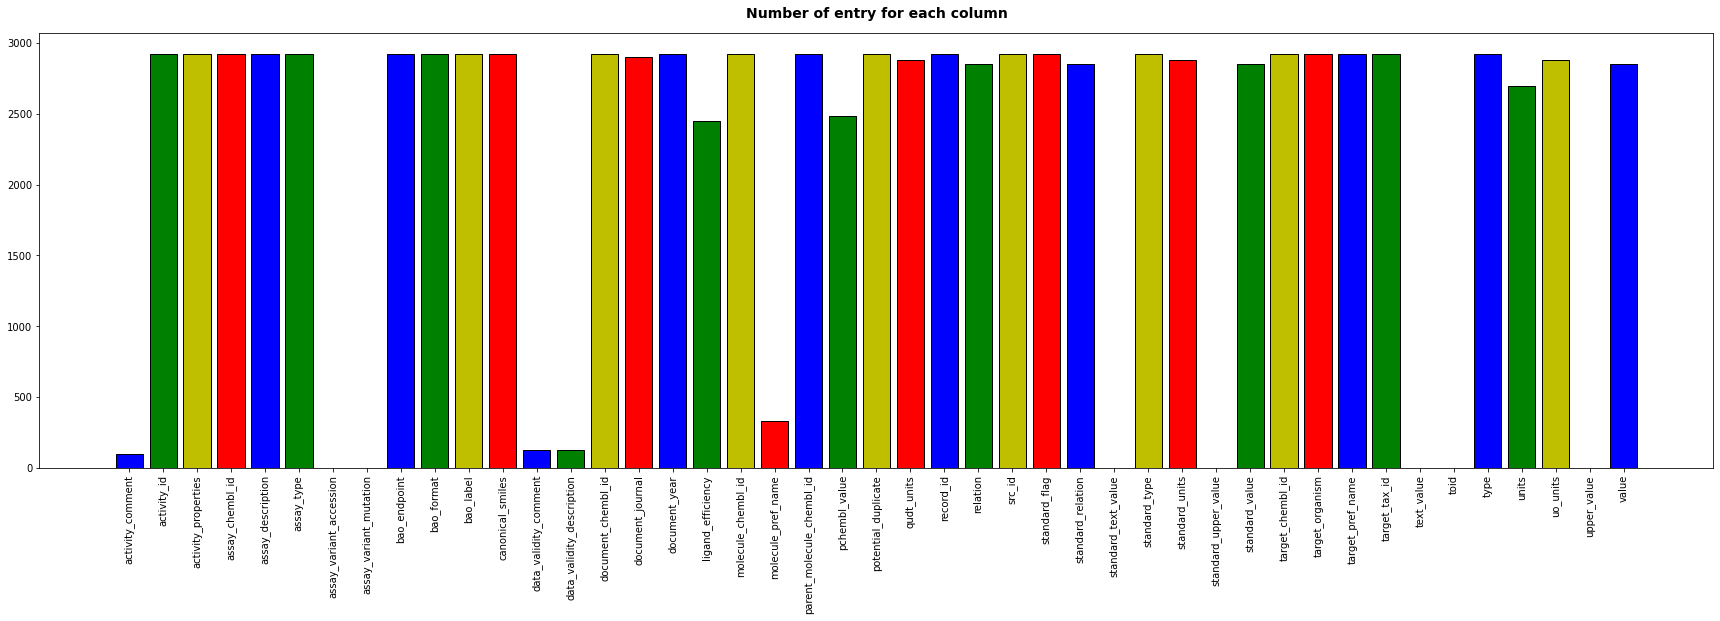

In [ ]:
x = column_name
y = each_count
# Make bar plot
plt.figure(figsize=(30,8))
plt.bar(x, y, color = ['b', 'g','y','r'], ec = 'black',align='center', bottom=None)
plt.title('Number of entry for each column', fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=90)
plt.show()

**Check unessasary Duplicates and Bugs**

In [ ]:
df1.info()

In [ ]:
print('TOTAL DATASET IS :',len(df1.canonical_smiles))
print('MISSING DATA IN STANDARD VALUE :',df1.standard_value.isna().values.sum())
print('MISSING DATA IN CANONICAL SMILES :',df1.canonical_smiles.isna().values.sum())
print('DUPLICATE CANONICAL SMILES :',len(df1.canonical_smiles)-len(df1.canonical_smiles.unique()))  
print('DUPLICATE MOLECULAR CHEMBL ID :',len(df1.molecule_chembl_id)-len(df1.molecule_chembl_id.unique()))
print('EMPTY MOLECULAR CHEMBL ID :',df1.molecule_chembl_id.isnull().sum())
print('STANDARD TYPE IS IN :',df1.standard_type.unique())

## **Handling missing data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.



*  A) pchembl_value



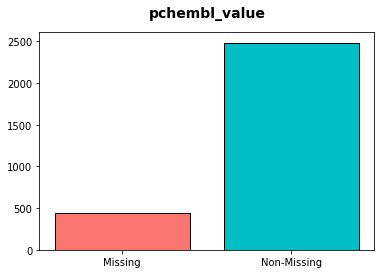

In [ ]:
# Bar plot of Missing vs Non-Missing Data
# Data
missing = df1.pchembl_value.isnull().sum()
nonmissing = df1.pchembl_value.notnull().sum()

x = ['Missing', 'Non-Missing']
y = [missing, nonmissing]

# Make bar plot
plt.bar(x, y, color = ['#F8766D', '#00BFC4'], ec = 'black')
plt.title('pchembl_value', fontsize=14, fontweight='bold', pad=15)
plt.show()



*   B) standard_value



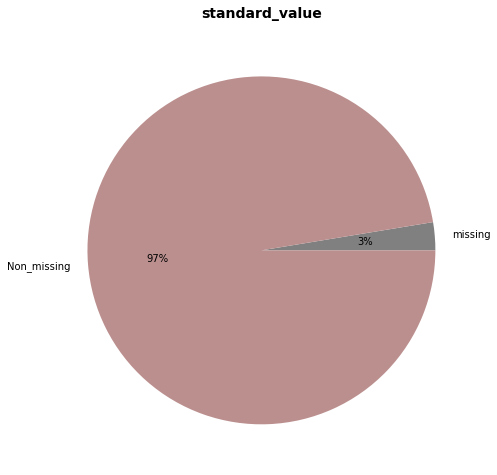

In [ ]:
# Bar plot of Missing vs Non-Missing standard_value from dataset
colors=[  'gray','rosybrown']
missing = df1.standard_value	.isnull().sum()
nonmissing = df1.standard_value	.notnull().sum()
x= [missing, nonmissing]
y = ['missing', 'Non_missing']
# Make pie chart
plt.figure(figsize =(8,8))
plt.pie(x,labels=y, autopct='%1.0f%%', labeldistance=1.1,colors=colors)
plt.title('standard_value', fontsize=14, fontweight='bold', pad=15)
plt.show()

In [ ]:
list=['pchembl_value','standard_value','canonical_smiles']
value=df1.standard_value.notna() 
df2 = df1[value]
print(len(df2))
df2[list]

2850


,pchembl_value,standard_value,canonical_smiles
0,5.15,7100.0,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,None,50000.0,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,6.62,238.0,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,7.24,57.0,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,7.27,54.0,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...
2921,5.49,3240.0,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2922,7.28,52.0,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2923,7.20,63.0,CC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2924,None,10000.0,CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCNC)cc1)c1ccccc1




*   C) canonical_smiles



**what entry of dataset have duplicate canonical_smiles**

In [ ]:
# Create a list for duplicate smiles
duplicated_canonical_smiles=df1[df1['canonical_smiles'].duplicated()]['canonical_smiles'].values
canonical_df=df1['canonical_smiles']
df=df1[canonical_df.isin(duplicated_canonical_smiles)]
sort_duplicates=df.sort_values(by=['canonical_smiles'])
sorted_duplicates=sort_duplicates.canonical_smiles
duplicated_df=pd.DataFrame(sorted_duplicates)
duplicated_df.head()

,canonical_smiles
1628,Brc1ccc2c(c1)CC/C2=C/c1cccnc1
594,Brc1ccc2c(c1)CC/C2=C/c1cccnc1
1576,Brc1ccc2c(c1)CC/C2=C/c1cccnc1
1600,Brc1ccc2c(c1)CC/C2=C/c1ccncc1
623,Brc1ccc2c(c1)CC/C2=C/c1ccncc1


In [ ]:
df_value_nr = df2.drop_duplicates(['canonical_smiles'])
df_value_nr[list]

,pchembl_value,standard_value,canonical_smiles
0,5.15,7100.0,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,None,50000.0,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,6.62,238.0,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,7.24,57.0,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,7.27,54.0,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...
2919,6.00,1002.0,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2920,6.05,900.0,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2921,5.49,3240.0,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2922,7.28,52.0,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1


In [ ]:
len(df1)-len(df_value_nr)

831

**Check unessasary Duplicates and Bugs were removed**

In [ ]:
print('TOTAL DATASET IS :',len(df3.canonical_smiles))
print('MISSING DATA IN STANDARD VALUE :',df3.standard_value.isna().values.sum())
print('MISSING DATA IN CANONICAL SMILES :',df3.canonical_smiles.isna().values.sum())
print('DUPLICATE CANONICAL SMILES :',len(df3.canonical_smiles)-len(df3.canonical_smiles.unique()))  
print('DUPLICATE MOLECULAR CHEMBL ID :',len(df3.molecule_chembl_id)-len(df3.molecule_chembl_id.unique()))
print('EMPTY MOLECULAR CHEMBL ID :',df3.molecule_chembl_id.isnull().sum())

TOTAL DATASET IS : 2095
MISSING DATA IN STANDARD VALUE : 0
MISSING DATA IN CANONICAL SMILES : 0
DUPLICATE CANONICAL SMILES : 0
DUPLICATE MOLECULAR CHEMBL ID : 0
EMPTY MOLECULAR CHEMBL ID : 0


## **Data pre-processing of the bioactivity data**

### **Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df_value_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
2919,CHEMBL5087363,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,1002.0
2920,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,900.0
2921,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,3240.0
2922,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,52.0


### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [ ]:
df4 = pd.read_csv('aromatase_IC50_bioactivity_data_preprocessed.csv')

In [ ]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='bioactivty_class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,bioactivty_class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2090,CHEMBL5087363,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,1002.00,intermediate
2091,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,900.00,active
2092,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,3240.00,intermediate
2093,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,52.00,active


Visualization of bioactivity_class's range in the dataset

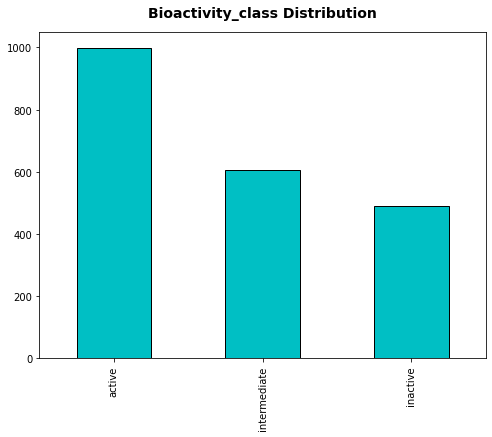

In [ ]:
# Bar plot of bioactivity class
df5.bioactivty_class.value_counts().plot.bar(figsize=(8,6), color='#00BFC4', ec='black')

plt.title('Bioactivity_class Distribution', fontsize=14, fontweight='black', pad=15)
plt.show()

---

**Save Dataset to drive**

In [ ]:
#! cp breastcancer_IC50_bioactivity_data_preprocessed_data.csv "/content/drive/MyDrive/Colab Notebooks/Dataset"

In [ ]:
! head '/content/drive/MyDrive/Colab Notebooks/Dataset/breastcancer_IC50_bioactivity_data_preprocessed_data.csv'

molecule_chembl_id,canonical_smiles,standard_value,bioactivty_class
CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC[C@@H]2[C@H]1CN1,50000.0,inactive
CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
CHEMBL324070,Cc1ccc(S(=O)(=O)n2cc(C(c3ccccc3)n3ccnc3)c3ccccc32)cc1,5400.0,intermediate
CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,41.0,active
CHEMBL111868,Cn1cc(C(c2ccc(F)cc2)n2ccnc2)c2cc(Br)ccc21,78.5,active
CHEMBL111888,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2cc(Br)ccc21,51.8,active


# Descriptor Calculation and Exploratory Data Analysis

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/breastcancer_IC50_bioactivity_data_preprocessed_data.csv')
df.head(3)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivty_class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

In [7]:
def lipinski(smiles):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [8]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.53,4.29,2.00,2.00
1,315.50,3.90,2.00,2.00
2,412.31,5.71,0.00,3.00
3,319.38,4.63,0.00,3.00
4,321.81,4.59,0.00,3.00
...,...,...,...,...
2090,306.37,3.82,2.00,4.00
2091,345.44,5.34,2.00,3.00
2092,331.42,4.95,2.00,3.00
2093,334.42,4.67,3.00,3.00




 **combine the 3 DataFrame**


In [9]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivty_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate,329.53,4.29,2.00,2.00
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive,315.50,3.90,2.00,2.00
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active,412.31,5.71,0.00,3.00
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active,319.38,4.63,0.00,3.00
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active,321.81,4.59,0.00,3.00
...,...,...,...,...,...,...,...,...
2090,CHEMBL5087363,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,1002.00,intermediate,306.37,3.82,2.00,4.00
2091,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,900.00,active,345.44,5.34,2.00,3.00
2092,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,3240.00,intermediate,331.42,4.95,2.00,3.00
2093,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,52.00,active,334.42,4.67,3.00,3.00


In [10]:
df_combined.standard_value.describe()

count     2095.00
mean     14480.42
std      50991.93
min          0.00
25%        130.00
50%       1252.00
75%       8760.00
max     777000.00
Name: standard_value, dtype: float64

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [11]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        if(molar==0):
          pIC50.append(molar)
        else:
          pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', 1)
        
    return x

In [12]:
-np.log10( (10**-9)* 100000000 )

1.0

In [13]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [14]:
for i in df_combined['standard_value']:
  if i > 100000000:
    print('Sholud Normalize')
print('No extra vlue')

No extra vlue


In [15]:
df_final = pIC50(df_combined)
df_final

,molecule_chembl_id,canonical_smiles,bioactivty_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.53,4.29,2.00,2.00,5.15
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.50,3.90,2.00,2.00,4.30
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.31,5.71,0.00,3.00,6.62
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.38,4.63,0.00,3.00,7.24
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.81,4.59,0.00,3.00,7.27
...,...,...,...,...,...,...,...,...
2090,CHEMBL5087363,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,intermediate,306.37,3.82,2.00,4.00,6.00
2091,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,active,345.44,5.34,2.00,3.00,6.05
2092,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,intermediate,331.42,4.95,2.00,3.00,5.49
2093,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,active,334.42,4.67,3.00,3.00,7.28


In [70]:
type(df_final.MW)

pandas.core.series.Series

In [104]:
df_final.pIC50.describe()

count   2095.00
mean       6.04
std        1.30
min        0.00
25%        5.05
50%        5.90
75%        6.89
max       10.82
Name: pIC50, dtype: float64

In [105]:
df_combined.standard_value.describe()

count     2095.00
mean     14480.42
std      50991.93
min          0.00
25%        130.00
50%       1252.00
75%       8760.00
max     777000.00
Name: standard_value, dtype: float64

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Frequency plot of the bioactivity classes**

Text(0, 0.5, 'Frequency')

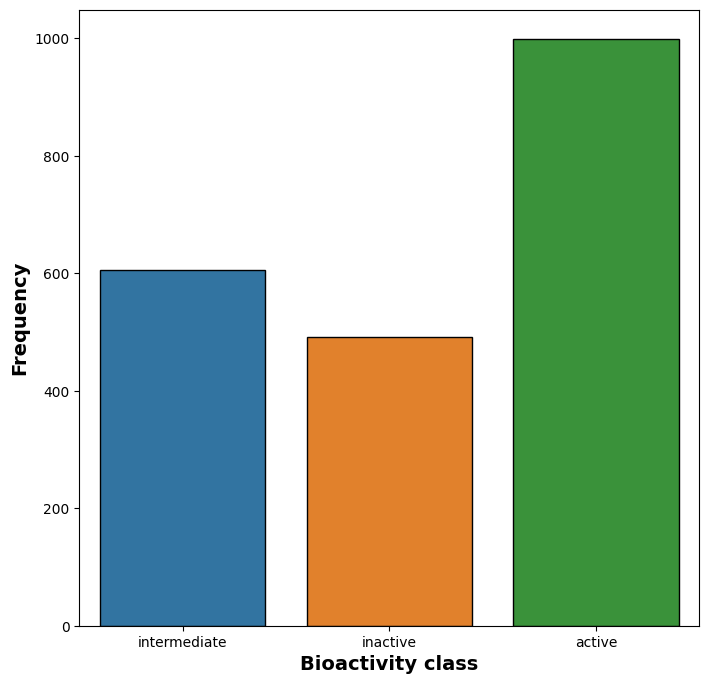

In [17]:
plt.figure(figsize=(8,8))

sns.countplot(x='bioactivty_class', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# plt.savefig('plot_bioactivity_class.png')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

In [18]:
# def bio_activity_class(bioactivity_class1,bioactivity_class2):
#    bioactivity_class1=df_final[df_final.bioactivty_class==bioactivity_class1]
#    bioactivity_class2=df_final[df_final.bioactivty_class==bioactivity_class2]
#    bioactivity_class= pd.concat([df_final[bioactivity_class1], df_final[bioactivity_class1] ])
#    return bioactivity_class.toarray()

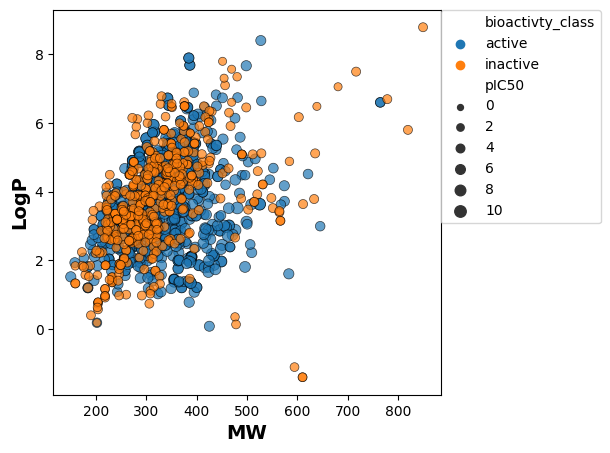

In [132]:
plt.figure(figsize=(5,5))
bio_activity_class=pd.concat([df_final[df_final.bioactivty_class == 'active'],df_final[df_final.bioactivty_class == 'inactive']],ignore_index=True)
sns.scatterplot(x='MW', y='LogP', data=bio_activity_class, hue='bioactivty_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

In [ ]:
# df_final.drop(df_final[df_final['bioactivty_class'] == 'intermediate'].index, inplace = True)
# df_final

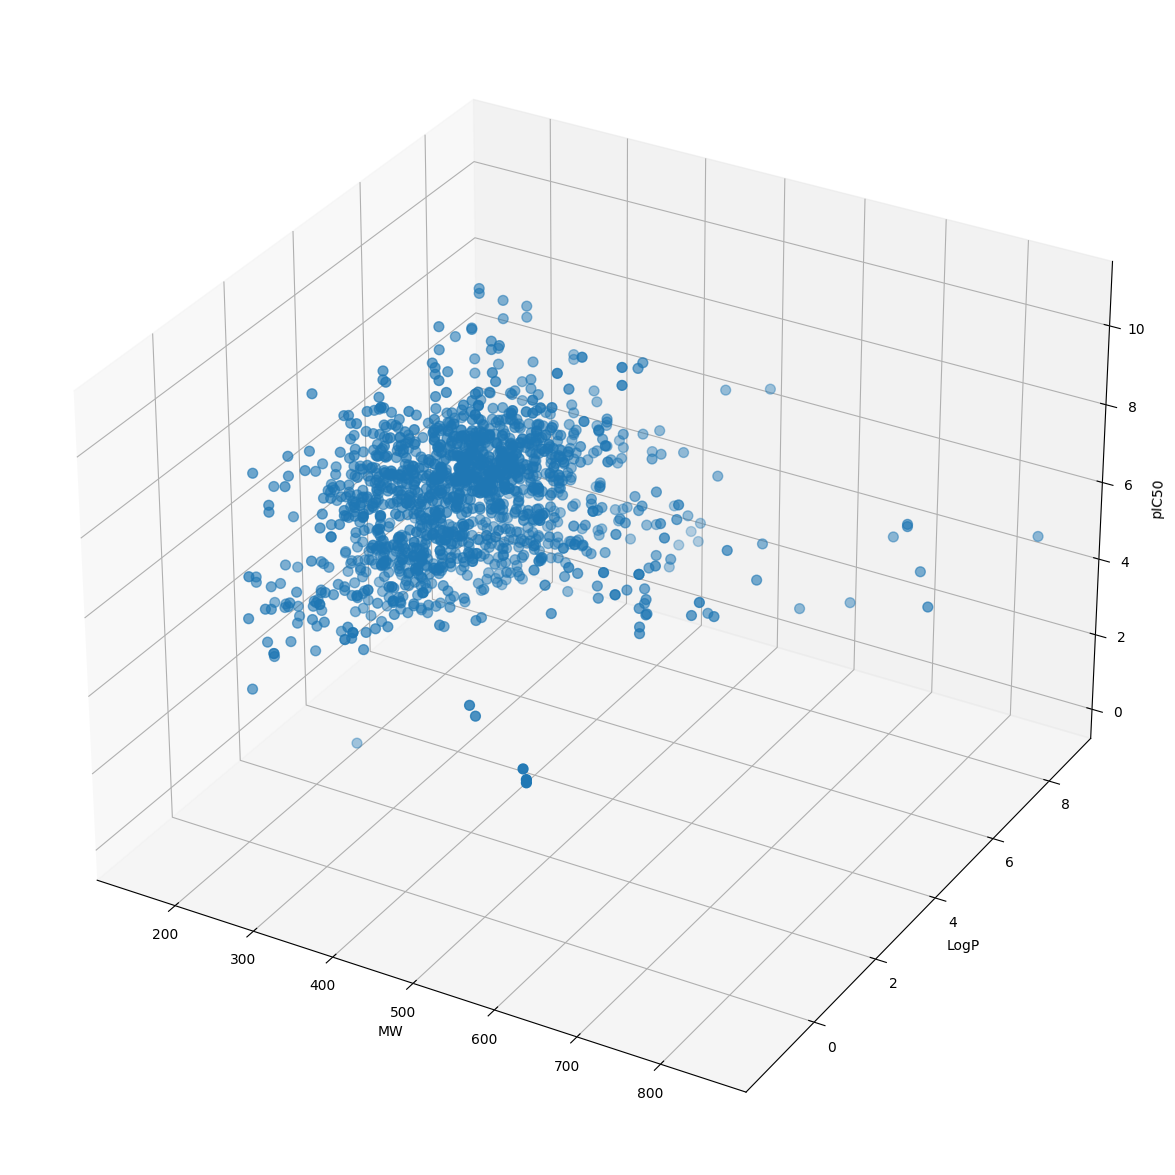

In [131]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( df_final.MW,df_final.LogP,df_final.pIC50, data=bio_activity_class, s=50)
ax.set_xlabel('MW')
ax.set_ylabel('LogP')
ax.set_zlabel('pIC50')
plt.show()

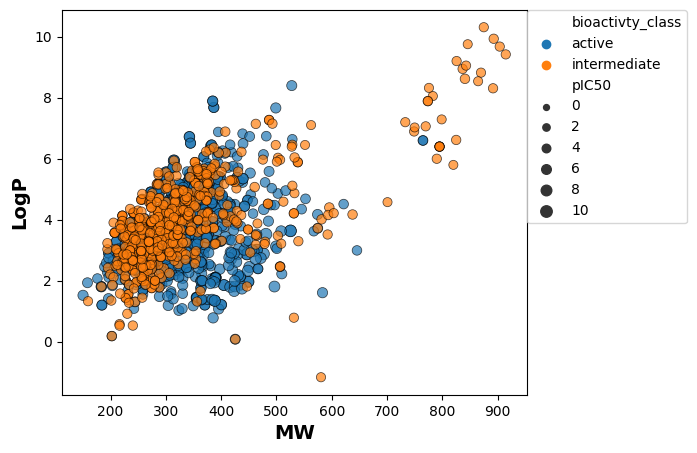

In [20]:
plt.figure(figsize=(6,5))
active=df_final[df_final.bioactivty_class == 'active']
intermediate=df_final[df_final.bioactivty_class == 'intermediate']
bio_activity_class=pd.concat([active,intermediate],ignore_index=True)
sns.scatterplot(x='MW', y='LogP', data=bio_activity_class, hue='bioactivty_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

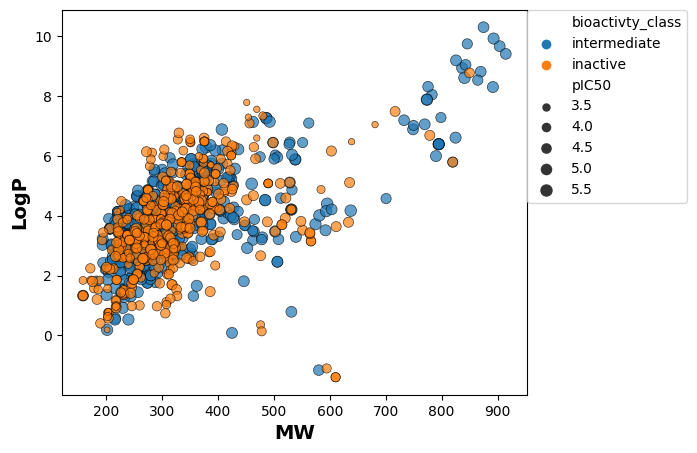

In [21]:
plt.figure(figsize=(6,5))
intermediate=df_final[df_final.bioactivty_class == 'intermediate']
inactive=df_final[df_final.bioactivty_class == 'inactive']
bio_activity_class=pd.concat([intermediate,inactive],ignore_index=True)
sns.scatterplot(x='MW', y='LogP', data=bio_activity_class, hue='bioactivty_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

# Box plot

#### **pIC50 value**

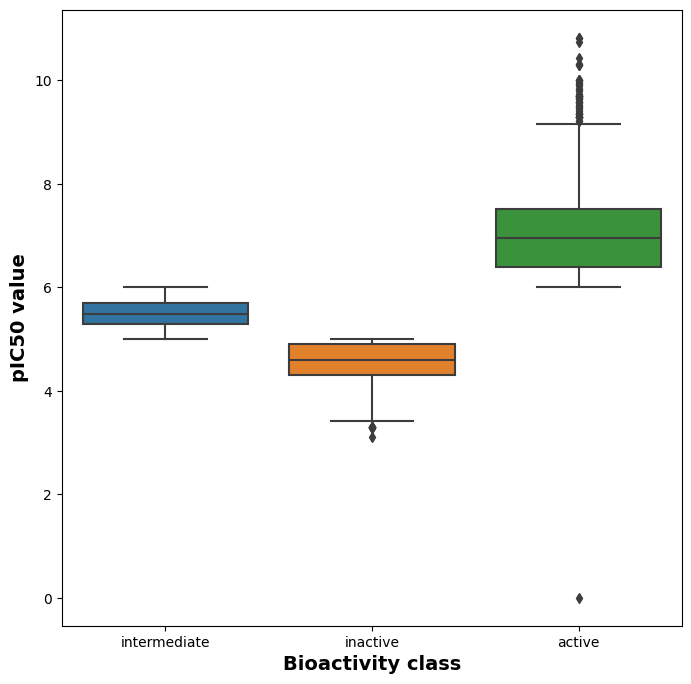

In [22]:
plt.figure(figsize=(8,8))

sns.boxplot(x = 'bioactivty_class', y = 'pIC50', data = df_final)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
# seed the random number generator
  seed(1)

# bioactivty_classes active ,inactive and intermediate
  selection = [descriptor, 'bioactivty_class']
  df = df_final[selection]
  active = df[df.bioactivty_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivty_class']
  df = df_final[selection]
  intermediate = df[df.bioactivty_class == 'intermediate']
  intermediate = intermediate[descriptor]

  selection = [descriptor, 'bioactivty_class']
  df = df_final[selection]
  inactive = df[df.bioactivty_class == 'inactive']
  inactive = inactive[descriptor]

  

# compare samples
  stat0, p0 = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat0, p0))
  stat1, p1 = mannwhitneyu(active, intermediate)
  #print('Statistics=%.3f, p=%.3f' % (stat1, p1))
  stat2, p2 = mannwhitneyu(inactive, intermediate)
  #print('Statistics=%.3f, p=%.3f' % (stat2, p2))

# interpret
  alpha = 0.05
  if p0 > alpha:
    interpretation0 = 'Same distribution (fail to reject H0)'
  else:
    interpretation0 = 'Different distribution (reject H0)'
  if p1 > alpha:
    interpretation1 = 'Same distribution (fail to reject H0)'
  else:
    interpretation1 = 'Different distribution (reject H0)'
  if p2 > alpha:
    interpretation2 = 'Same distribution (fail to reject H0)' 
  else:
    interpretation2 = 'Different distribution (reject H0)'

    
  
  results1 = pd.DataFrame({'Comparison':['active, inactive'],
                          'Descriptor':descriptor,
                          'Statistics':stat0,
                          'p':p0,
                          'alpha':alpha,
                          'Interpretation':interpretation0}, index=[0])
  results2 = pd.DataFrame({'Comparison':['active, intermediate'],
                          'Descriptor':descriptor,
                          'Statistics':stat1,
                          'p':p1,
                          'alpha':alpha,
                          'Interpretation':interpretation1}, index=[1])
  results3 = pd.DataFrame({'Comparison':['inactive, intermediate'],
                          'Descriptor':descriptor,
                          'Statistics':stat2,
                          'p':p2,
                          'alpha':alpha,
                          'Interpretation':interpretation2}, index=[2])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  result=pd.concat([results1,results2,results3])
  result.to_csv(filename)

  return result

In [ ]:
mannwhitney('pIC50')

# MW

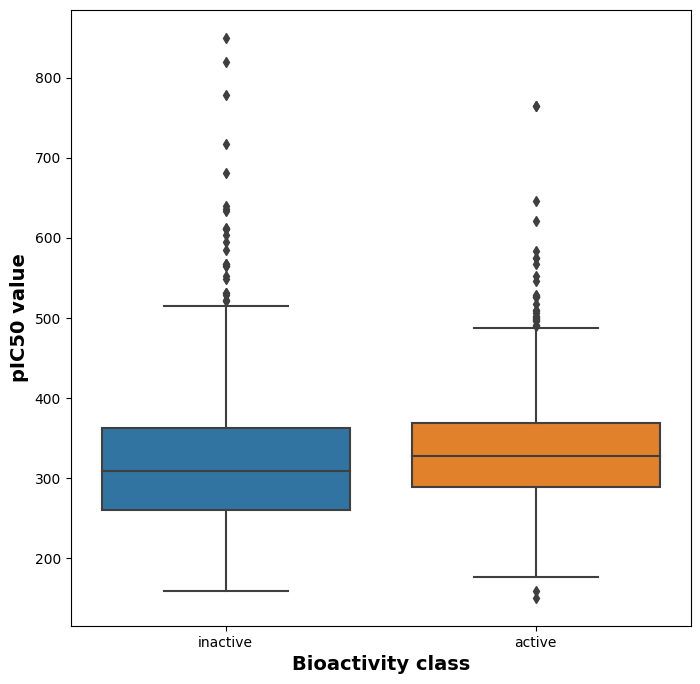

In [144]:
plt.figure(figsize=(8,8))

sns.boxplot(x = 'bioactivty_class', y = 'MW', data = df_final)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [145]:
mannwhitney('MW')

,Comparison,Descriptor,Statistics,p,alpha,Interpretation
0,"active, inactive",MW,278916.00,0.00,0.05,Different distribution (reject H0)


# LogP

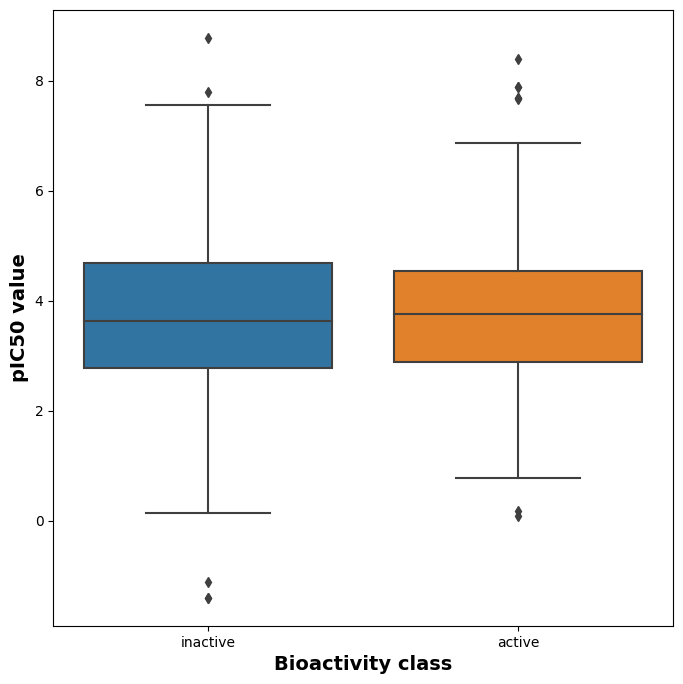

In [146]:
plt.figure(figsize=(8,8))

sns.boxplot(x = 'bioactivty_class', y = 'LogP', data = df_final)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [147]:
mannwhitney('LogP')

,Comparison,Descriptor,Statistics,p,alpha,Interpretation
0,"active, inactive",LogP,246357.00,0.89,0.05,Same distribution (fail to reject H0)


# NumHDonors

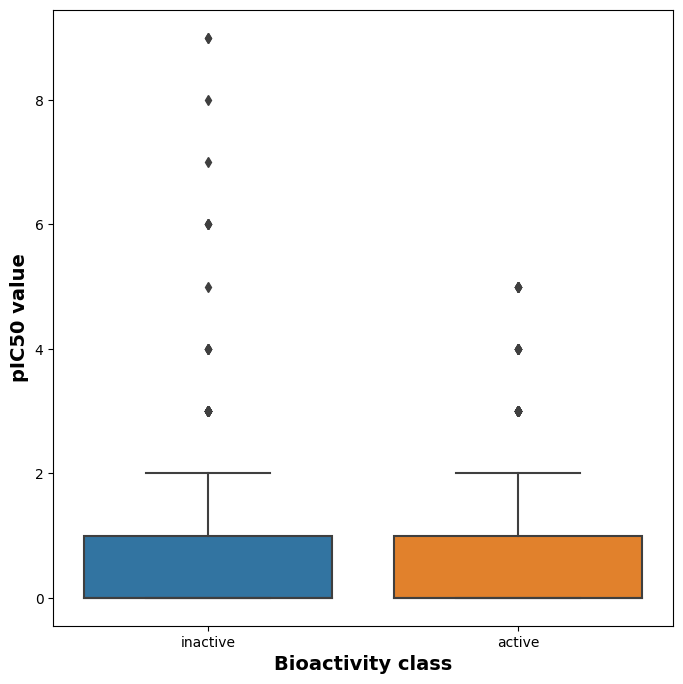

In [148]:
plt.figure(figsize=(8,8))

sns.boxplot(x = 'bioactivty_class', y = 'NumHDonors', data = df_final)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [149]:
mannwhitney('NumHDonors')

,Comparison,Descriptor,Statistics,p,alpha,Interpretation
0,"active, inactive",NumHDonors,230774.50,0.04,0.05,Different distribution (reject H0)


#NumHAcceptors

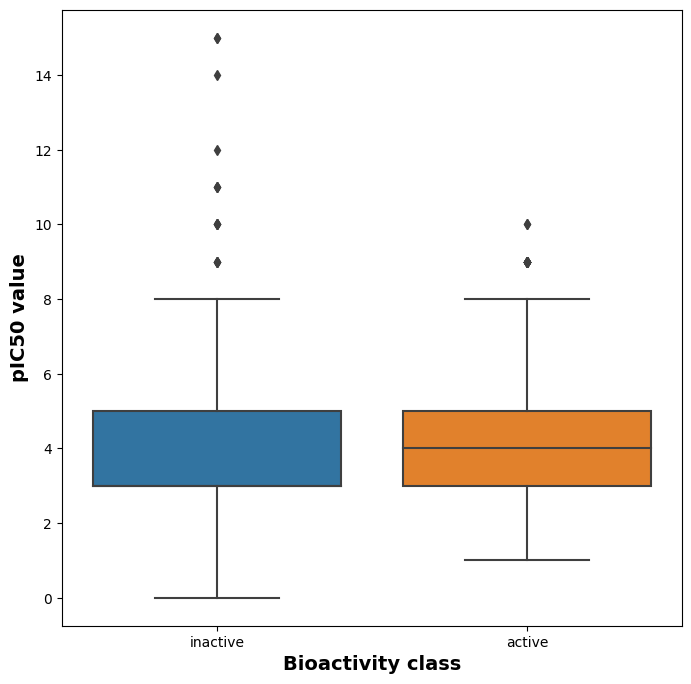

In [150]:
plt.figure(figsize=(8,8))

sns.boxplot(x = 'bioactivty_class', y = 'NumHAcceptors', data = df_final)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [151]:
mannwhitney('NumHAcceptors')

,Comparison,Descriptor,Statistics,p,alpha,Interpretation
0,"active, inactive",NumHAcceptors,263115.00,0.02,0.05,Different distribution (reject H0)


##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

In [33]:
#! zip -r results.zip . -i *.csv *.pdf

In [34]:
#! cp results.zip "/content/drive/MyDrive/Colab Notebooks/"

In [35]:
!ls "/content/drive/MyDrive/Colab Notebooks/"

 CDD_ML_Part_2_Acetylcholinesterase_Exploratory_Data_Analysis.ipynb
 CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb
 Dataset
 dataset_pIC50_pubchem_fp.csv
'Descriptor Calculator'
 PreliminaryProject.ipynb
 PYF.ipynb
 results.zip


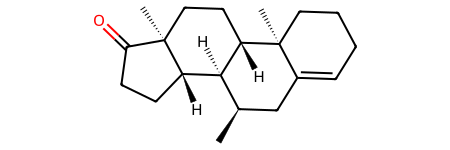

In [152]:
Chem.MolFromSmiles(df_final.canonical_smiles[2024])

---
#  Descriptor Calculation and Dataset Preparation
Calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we will be preparing this into a dataset for subsequent model building.



In [153]:
print(df_final.shape)
df_final.head()

(1490, 8)


,molecule_chembl_id,canonical_smiles,bioactivty_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.50,3.90,2.00,2.00,4.30
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.31,5.71,0.00,3.00,6.62
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.38,4.63,0.00,3.00,7.24
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.81,4.59,0.00,3.00,7.27
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.38,4.63,0.00,3.00,7.39


In [ ]:
! unzip '/content/drive/MyDrive/Colab Notebooks/Descriptor Calculator/padel.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/Descriptor Calculator/padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_final[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

In [ ]:
! cat molecule.smi | wc -l

# Calculate fingerprint descriptors


Calculate PaDEL descriptors

In [ ]:
#what content is in padel.sh
! cat '/content/drive/MyDrive/Colab Notebooks/Descriptor Calculator/padel.sh'

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash '/content/drive/MyDrive/Colab Notebooks/Descriptor Calculator/padel.sh'

In [ ]:
! ls -l

In [ ]:
#!cp descriptors_output.csv '/content/drive/MyDrive/Colab Notebooks/Descriptor Calculator/'

In [ ]:
! ls -l '/content/drive/MyDrive/Colab Notebooks/Descriptor Calculator/'

total 28813
-rw------- 1 root root  3734934 Mar 24 19:06 descriptors_output.csv
-rw------- 1 root root      231 Mar 24 13:55 padel.sh
-rw------- 1 root root 25768637 Mar 24 13:55 padel.zip


# Preparing the X and Y Data Matrices


X data matrix

In [41]:
calculated_descriptor=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Descriptor Calculator/descriptors_output.csv')
calculated_descriptor

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL341591,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL2111947,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL113637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL431859,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL112021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,CHEMBL5087363,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2091,CHEMBL5092560,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2092,CHEMBL5092843,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2093,CHEMBL5074047,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
descriptor_x=calculated_descriptor.drop(columns=['Name'])
descriptor_x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2091,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2092,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2093,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Y variable

In [39]:
descriptor_y=df_final['pIC50']
descriptor_y

0      5.15
1      4.30
2      6.62
3      7.24
4      7.27
       ... 
2090   6.00
2091   6.05
2092   5.49
2093   7.28
2094   7.20
Name: pIC50, Length: 2095, dtype: float64

Combining X and Y variable

In [42]:
# Correlation Plot
corr =calculated_descriptor.corr()
corr

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
PubchemFP0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP1,NaN,1.00,0.08,0.02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP2,NaN,0.08,1.00,0.22,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP3,NaN,0.02,0.22,1.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PubchemFP876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset=pd.concat([descriptor_x,descriptor_y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.15
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.62
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.24
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.00
2091,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.05
2092,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.49
2093,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.28


In [ ]:
dataset.to_csv('dataset_pIC50_pubchem_fp.csv',index=False)

In [ ]:
#! cp dataset_pIC50_pubchem_fp.csv '/content/drive/MyDrive/Colab Notebooks/'

In [ ]:
! ls -l '/content/drive/MyDrive/Colab Notebooks/'

total 6803
-rw------- 1 root root  271306 Mar 19 21:38  CDD_ML_Part_2_Acetylcholinesterase_Exploratory_Data_Analysis.ipynb
-rw------- 1 root root  226308 Mar 21 07:26  CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb
drwx------ 3 root root    4096 Mar 17 14:04  Dataset
-rw------- 1 root root 3738793 Mar 24 19:36  dataset_pIC50_pubchem_fp.csv
drwx------ 2 root root    4096 Mar 24 14:44 'Descriptor Calculator'
-rw------- 1 root root 1798372 Mar 17 18:32  PreliminaryProject.ipynb
-rw------- 1 root root  680813 Mar 29 14:32  PYF.ipynb
-rw------- 1 root root  240892 Mar 23 19:01  results.zip


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_pIC50_pubchem_fp.csv')

In [ ]:
dataset.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.15
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.62
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.24
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.27


# Input Features

In [ ]:
X =dataset.drop('pIC50', axis=1)
print(X.shape)
X

(2095, 881)


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2091,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2092,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2093,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y=dataset.pIC50
print(Y.shape)
Y

(2095,)


0      5.15
1      4.30
2      6.62
3      7.24
4      7.27
       ... 
2090   6.00
2091   6.05
2092   5.49
2093   7.28
2094   7.20
Name: pIC50, Length: 2095, dtype: float64

# Determine relation of dataset

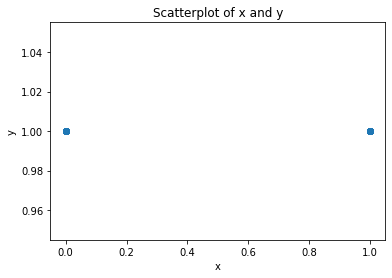

In [ ]:
import matplotlib.pyplot as plt

# Create scatterplot


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.PubchemFP0, X.PubchemFP1,X.PubchemFP2,X.PubchemFP3,X.PubchemFP4,X.PubchemFP5,Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()



#  Remove low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
# .8 * (1 - .8)
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(2095, 571)

# Split Dataset into train and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((1676, 571), (1676,))

In [ ]:
X_test.shape, Y_test.shape

((419, 571), (419,))

# Comparing several ML algorithms for build regression models

#  Compare ML algorithms

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 74%|███████▍  | 31/42 [04:27<01:35,  8.64s/it]


KeyboardInterrupt: ignored

In [ ]:
# Performance table of the training set (80% subset)
predictions_train

In [ ]:
predictions_test

#  Data visualization of model performance

In [ ]:
# Bar plot of R-squared values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

In [ ]:
# Bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:
# Bar plot of calculation time
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

# Compare top three models 

In [ ]:

models = {
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    print(f'{name} Metrics:')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'R-squared: {r2:.2f}')

# Building a Regression Model using Random Forest

In [ ]:
np.random.seed(123)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

In [ ]:
Y_pred = model.predict(X_test)
Y_pred.shape

# Scatter Plot of Experimental vs Predicted pIC50 Values

In [ ]:
sns.set(color_codes=True)
sns.set_style("dark")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(10, 10)
plt.show()